# Solution for Homework 7

**Disclaimer:** For this assignment, there are some things that you are asked to do that we have not explicitly done in class. 
For example, you will be asked to modify figures in Matplotlib in new ways. Please use your favorite search engine to look up how to do these things. Realistically, when you use Python in your jobs in the future you will be spending a significant portion of your time to look up new things. And it's never too early to practice that skill. 

## Problem

You can find the data files "Mouse_metadata.csv" and "Study_results.csv" which you will need for this homework on Canvas. 

In a pharmaceutical study, 249 mice identified with squamous cell carcinoma (skin cancer) tumor growth were treated with a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The scientists measured the tumor growth over time (volume in $mm^3$) and the number of metastatic sites. The purpose of the study was to compare the performace of the new drug "Capomulin" to several other existing drug regimens. 

Begin by loading the two data sets into Pandas as data frames. 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt

# start by importing the files...

# Study data files - obviously, you should change the path to something on your machine
mouse_metadata = "C:/Users/Jen/Documents/Math 167PS/Homework/Homework07/Mouse_metadata.csv"
study_results = "C:/Users/Jen/Documents/Math 167PS/Homework/Homework07/Study_results.csv"

# Read data into Pandas data frames
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Look at your data
# mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


(a) Describe the two data files. How many rows and columns are in each file? What variables are in the columns? What is in the rows? What is the Pandas index currently used? Do the two files have any common columns?

The file "study_results" has four columns: Mouse ID, Timepoint, Tumor Volumne and Metastatic sites) and 1893 rows. 
The file "mouse_metadata" has five columns (Mouse ID, Drug Regimen, Sex, Age, and Weight) and 249 rows. The column "Mouse ID" connects the two files. Currently, both files use the built in Python range index. 

(b) Write Pandas code to find the number of male and female mice that were subjected to each drug regimen. Save the results as a Pandas data frame with the names of the drugs as the index and two columns (one for male, one for female). The two columns should contain the counts of individuals subjected to each drug regimen. Display your resulting data frame using a print statement. 

In [2]:
#Combine the two data frames. Mouse ID is the common column.
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_data.head()

df = combined_data.groupby(['Drug Regimen', 'Sex']).size()
df = df.unstack()
print(df)

Sex           Female  Male
Drug Regimen              
Capomulin        128   102
Ceftamin          92    86
Infubinol         95    83
Ketapril          58   130
Naftisol          86   100
Placebo          102    79
Propriva          74    87
Ramicane          74   154
Stelasyn         107    74
Zoniferol        119    63


(c) Use Matplotlib to create a side-by-side bar plot that shows the numbers of males and females under each drug regimen. Make sure to label your plot (label the bar groups with the names of the drugs, create a legend, label the y-axis and title your plot). Use different colors for males (blue) and females (red). Look up how to rotate axis lables (to make all the drug names readable). 

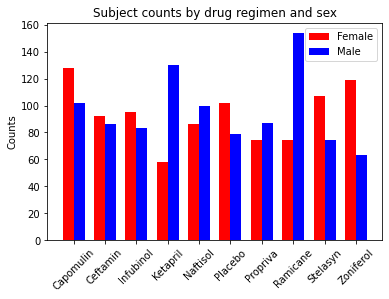

In [3]:
x_pos = np.arange(len(df)) # x-coordinates of the bars

plt.bar(x_pos, df.Female, width = -0.35, align = 'edge', label = 'Female', color = 'r')
plt.bar(x_pos, df.Male, width = 0.35, align = 'edge', label = 'Male', color = 'b')

plt.ylabel('Counts')
plt.title('Subject counts by drug regimen and sex')

plt.xticks(x_pos, df.index, rotation = 45)
plt.legend();

(d) Use Pandas to find the average tumor size for each drug regiment, separately at each time-point. Store your results in a Pandas data frame with time point as the index and ten columns (one column per drug regimen). Display your resulting data frame using a print statement. 

**Hint:** Recall, that ```unstack()``` is the opposite of the ```melt()``` procedure. Read up on details in either your text or on the Python documentation website. 

In [4]:
df2 = combined_data.groupby(['Timepoint', 'Drug Regimen'])['Tumor Volume (mm3)'].mean()
df2 = df2.unstack()
print(df2)

Drug Regimen  Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol  \
Timepoint                                                             
0             45.000000  45.000000  45.000000  45.000000  45.000000   
5             44.266086  46.503051  46.541247  47.389175  46.796098   
10            43.084291  48.285125  49.403909  49.582269  48.694210   
15            42.064317  50.094055  51.296397  52.399974  50.933018   
20            40.716325  52.157049  53.197691  54.920935  53.644087   
25            39.939528  54.287674  55.715252  57.678982  56.731968   
30            38.769339  56.769517  58.299397  60.994507  59.559509   
35            37.816839  58.827548  60.742461  63.371686  62.685087   
40            36.958001  61.467895  63.162824  66.068580  65.600754   
45            36.236114  64.132421  65.755562  70.662958  69.265506   

Drug Regimen    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                            
0      

(e) Use Matplotlib to create a line-graph of the average tumor size as a function of time for each drug regimen. Include all ten drugs in the same plot and use different colors for different drugs. Make sure to label your plot (include x- and y-axis labels, title, legend for which curve belongs to which drug). Please place the legend outside the plot (you should look up how to do this).

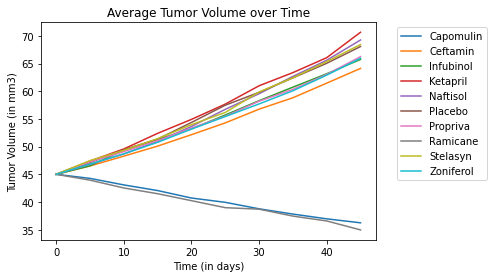

In [5]:
fig = plt.figure()  # making new empty figure environment
ax = plt.axes()


time = np.linspace(0,45,10) # time points

for i in range(10):
    name = df2.columns[i]
    ax.plot(time,df2[name], label = name)
    
ax.set_title("Average Tumor Volume over Time")
ax.set_xlabel('Time (in days)')
ax.set_ylabel('Tumor Volume (in mm3)')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.));

(f) Use Pandas to create a Data Frame that has one row per mouse, index values should be Mouse IDs, and has exatly the following columns: "Weight" (initial mouse weight in grams), "Sex", "Age" (of mouse at the beginning of trial in months), "Tumor" (tumor volume on day 45 - include only mice who lived until day 45), "Drug Regimen". Display your resulting data frame using a print statement. 

In [6]:
df3 = combined_data[combined_data.Timepoint==0]
del df3['Metastatic Sites']
del df3['Timepoint']
del df3['Tumor Volume (mm3)']

final_data = combined_data[combined_data.Timepoint == 45]
final_size = final_data[['Mouse ID', 'Tumor Volume (mm3)']]

df4 = pd.merge(final_size, df3, on = 'Mouse ID')
df4.set_index(['Mouse ID'], inplace = True)
df4 = df4[['Weight (g)', 'Sex', 'Age_months','Tumor Volume (mm3)','Drug Regimen']]
print(df4)

          Weight (g)     Sex  Age_months  Tumor Volume (mm3) Drug Regimen
Mouse ID                                                                 
s185              17  Female           3           23.343598    Capomulin
x401              15  Female          16           28.484033    Capomulin
m601              17    Male          22           28.430964    Capomulin
u364              17    Male          18           31.023923    Capomulin
y793              17    Male          17           31.896238    Capomulin
...              ...     ...         ...                 ...          ...
p136              28  Female           5           63.488697    Zoniferol
q511              28  Female           2           68.611061    Zoniferol
q633              25    Male          12           70.827796    Zoniferol
s337              27    Male          14           62.109651    Zoniferol
w575              28  Female          16           68.401286    Zoniferol

[130 rows x 5 columns]


(g) Use Matplotlib to create a scatterplot of final tumor size on day 45 against initial mouse weight for the mice who survived until day 45. Use different colors for different drug treatments. Make sure to label your plot (include x- and y-axis labels, title, and a legend for which color belongs to which drug). Please place the legend outside the plot. 

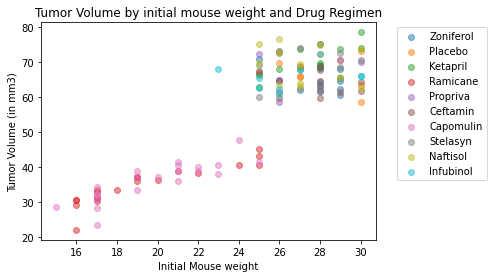

In [7]:
for i in range(len(set(df4['Drug Regimen']))):
    drug = list(set(df4['Drug Regimen']))[i]
    temp_df = df4[df4['Drug Regimen']== drug]
    plt.scatter(temp_df['Weight (g)'], temp_df['Tumor Volume (mm3)'], alpha=0.5, label = drug)  
       
plt.ylabel('Tumor Volume (in mm3)')
plt.xlabel('Initial Mouse weight')
plt.title('Tumor Volume by initial mouse weight and Drug Regimen')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.));

(h) Comment on what you see in the plot you just created. Do the mice seem to have been randomly assigned to the treatments? 

No. Apparently, mice with lower initial weight tend to have received either Capomulin or Ramicane. 

(i) Create a side-by-side boxplot for initial mouse weight across drug regimens. Order the drugs, so that the boxplots for the drugs "Capomulin" and "Ramicane" appear on the left. 

**Note:** Look at the matplotlib gallery to understand how to create a side-by-side boxplot. 

**Hint:** start with a list of lists of values you want to plot. 

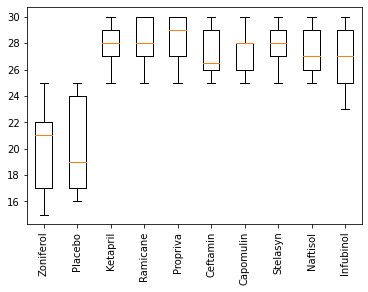

In [10]:
# we want data in form of a list of lists (one list for each drug)! 
# Note, that the lists are not of the same size, so stacking them into one data frame is not a good idea. 

df5 = combined_data[combined_data.Timepoint==0]

data = []
data.append(list(df5[df5['Drug Regimen']=='Capomulin']['Weight (g)']))
data.append(list(df5[df5['Drug Regimen']=='Ramicane']['Weight (g)']))

for drug in list(set(df5['Drug Regimen'])^{'Capomulin', 'Ramicane'}):
    data.append(list(df5[df5['Drug Regimen']==drug]['Weight (g)']))

plt.boxplot(data)
plt.xticks(range(1,11), list(set(df5['Drug Regimen'])), rotation = 90);
